# Reading a *scanning* Licel binary files

In [1]:
# Import plotting library
from matplotlib import pyplot as plt

# Import the module for raymetrics scanning files
from atmospheric_lidar import raymetrics

In [2]:
# Read the file
licel_file = raymetrics.ScanningFile('./sample_data/RM2121214.561377')

# The licel file object has several properties describing the file
print("Start time: {}, Stop times: {}".format(licel_file.start_time, licel_file.stop_time))
print("Latitude: {}, Longitude: {}".format(licel_file.latitude, licel_file.longitude))
print("Zenith angle: ", licel_file.zenith_angle)
print("Azimuth angle: ", licel_file.azimuth_angle)


Start time: 2021-02-12 14:55:44+00:00, Stop times: 2021-02-12 14:56:12+00:00
Latitude: 49.0953, Longitude: 8.4298
Zenith angle:  0.0
Azimuth angle:  0.0


In [3]:
# See available channel
# Note that the channels have a semi-descriptive name.
# This does not work always and you might need to set "use_id_as_name=True" when reading the file.
print("Available channels: ", licel_file.channels.keys())

Available channels:  odict_keys(['00355.p_an', '00355.p_ph', '00355.s_an', '00355.s_ph'])


In [4]:
# Get one channel of interest
channel = licel_file.channels['00355.p_an']

# The channel object has several properties describing the channel data. E.g.
print("Channel name: ", channel.channel_name)
print('Channel id: ', channel.id)
print("Wavelength: ", channel.wavelength)
print("Number of shots: ", channel.number_of_shots)
print("Is analog?: ", channel.is_analog)
print("ADC bits: ", channel.adcbits)

Channel name:  00355.p_an
Channel id:  BT0
Wavelength:  355
Number of shots:  601
Is analog?:  True
ADC bits:  12


In [5]:
# Data are stored in the .data property, already converted in physical quantities
channel.data

array([3.05932928, 3.05884169, 3.05900422, ..., 3.05876043, 3.05811031,
       3.05530668])

Text(0.5, 0, 'Range (m)')

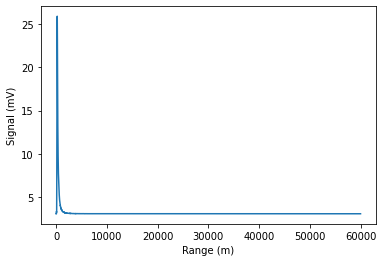

In [6]:
plt.plot(channel.z, channel.data)
plt.ylabel('Signal (mV)')
plt.xlabel('Range (m)')

In [7]:
# Photodiodes are stored in the .photodiodes dictionary
print("Has photodiode?:", licel_file.has_photodiode )

print("Photodiode keys: ", licel_file.photodiodes.keys())

Has photodiode?: True
Photodiode keys:  odict_keys(['00355.p_an'])


Photodiode id:  PD0


Text(0, 0.5, 'mV')

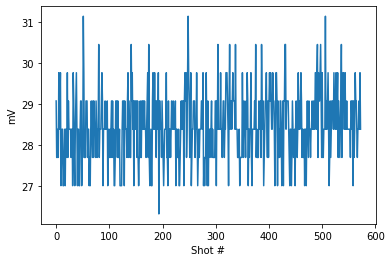

In [8]:
# Get one photodiode
photodiode = licel_file.photodiodes['00355.p_an']

# Again, several properties are available
print('Photodiode id: ', photodiode.id)

plt.plot(photodiode.data)
plt.xlabel('Shot #')
plt.ylabel('mV')